In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
num_records, num_features = df.shape
print(f"Number of records: {num_records}")
print(f"Number of features: {num_features}")

Number of records: 8124
Number of features: 23


In [6]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

print(f"Categorical features: {categorical_features}")
print(f"Numerical features: {numerical_features}")

Categorical features: ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
Numerical features: []


In [7]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
df['stalk-root'].value_counts()

stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: count, dtype: int64

In [9]:
df["stalk-root"].replace("?", df["stalk-root"].mode()[0], inplace=True)

In [10]:
df['stalk-root'].value_counts()

stalk-root
b    6256
e    1120
c     556
r     192
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
for col in df.columns:
  if df[col].dtype==object:
     df[col]=encoder.fit_transform(df[col])

In [13]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [14]:
from sklearn.model_selection import train_test_split
X = df.drop('class',axis = True)
y = df['class']

In [15]:
print(y)

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32


In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state= 42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6499, 22), (1625, 22), (6499,), (1625,))

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=70, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=70, random_state=42)

In [18]:
rf_pred = rf_model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report

In [20]:
acc = accuracy_score(y_test,rf_pred)
print(f" Accuracy Score: {acc}")

 Accuracy Score: 1.0


In [21]:
recall = recall_score(y_test,rf_pred)
print(f" Recall Score: {recall}")

 Recall Score: 1.0


In [22]:
cf = classification_report(y_test,rf_pred)
print("Classification Report:\n",cf)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [23]:
cm = confusion_matrix(y_test,rf_pred)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[843   0]
 [  0 782]]


In [24]:
feature_importances = rf_model.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)


Feature Importance:
                     Feature  Importance
4                       odor    0.176170
8                 gill-color    0.112562
7                  gill-size    0.111835
19         spore-print-color    0.097173
18                 ring-type    0.081247
20                population    0.059583
3                    bruises    0.055644
10                stalk-root    0.051833
11  stalk-surface-above-ring    0.046268
12  stalk-surface-below-ring    0.035008
6               gill-spacing    0.034198
21                   habitat    0.025661
13    stalk-color-above-ring    0.021807
17               ring-number    0.019297
9                stalk-shape    0.018521
2                  cap-color    0.014513
14    stalk-color-below-ring    0.013835
1                cap-surface    0.010775
16                veil-color    0.005612
0                  cap-shape    0.005058
5            gill-attachment    0.003400
15                 veil-type    0.000000


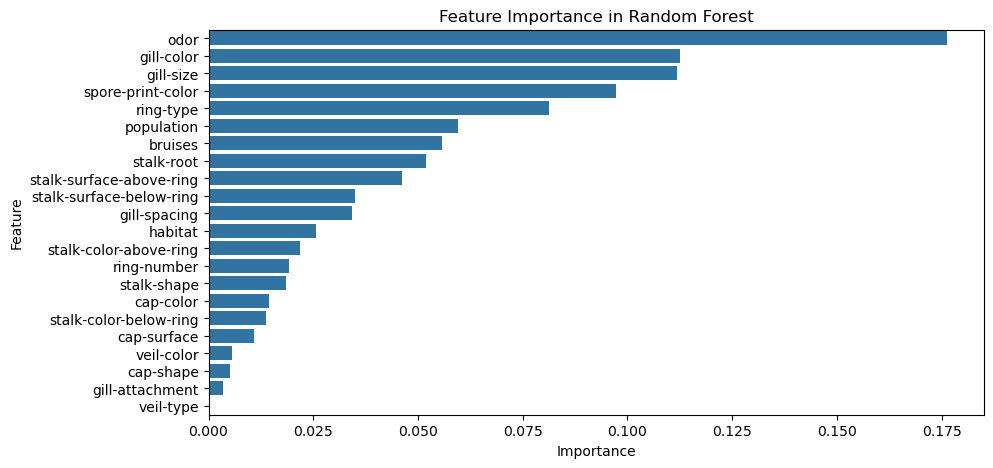

In [25]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance in Random Forest")
plt.show()

In [26]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
y_pred = dtc.predict(X_test)

In [28]:
acc_dtc = accuracy_score(y_pred,y_test)
print(f" Accuracy Score of Decision Tree Classifier: {acc_dtc}")

 Accuracy Score of Decision Tree Classifier: 1.0


In [29]:
cr_dtc = classification_report(y_pred,y_test)
print("Classification Report:\n",cr_dtc)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
param_grid = {
    "n_estimators": [20, 30],  # Reduce number of trees further
    "max_depth": [3, 7],  # Further limit tree depth
    "min_samples_split": [20, 40],  # Increase min samples per split
    "min_samples_leaf": [15, 25],  # Increase min samples per leaf
    "max_features": [0.5]  # Further restrict features per split
}

In [32]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 7], 'max_features': [0.5],
                         'min_samples_leaf': [15, 25],
                         'min_samples_split': [20, 40],
                         'n_estimators': [20, 30]},
             scoring='accuracy')

In [33]:
best_params = grid_search.best_params_
print("Best Parameters from GridSearchCV:", best_params)

Best Parameters from GridSearchCV: {'max_depth': 7, 'max_features': 0.5, 'min_samples_leaf': 15, 'min_samples_split': 40, 'n_estimators': 30}


In [34]:
rf_optimized = RandomForestClassifier(**best_params, random_state=42)
rf_optimized.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features=0.5, min_samples_leaf=15,
                       min_samples_split=40, n_estimators=30, random_state=42)

In [35]:
y_pred = rf_optimized.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
 [[843   0]
 [  0 782]]


In [37]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('mushrooms.csv')

# Encode all categorical features using LabelEncoder
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split data
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define parameter grid for GridSearchCV (smaller and focused on reducing overfitting)
param_grid = {
    'n_estimators': [10, 30, 50],
    'max_depth': [5, 8, 10],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

# Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate optimized model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nOptimized Model Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Cross-validation accuracy scores
cv_scores = cross_val_score(best_model, X_train, y_train, cv=cv)
print("\nCross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}

Optimized Model Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
 [[842   0]
 [  0 783]]

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV accuracy: 1.0


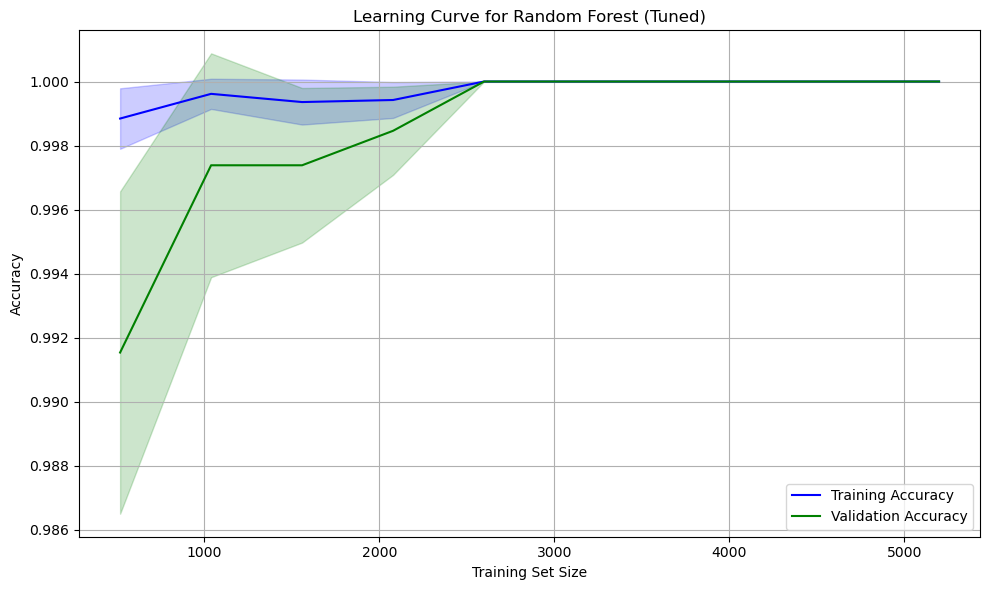

In [38]:
from sklearn.model_selection import learning_curve

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=cv,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', n_jobs=-1
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')

plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='green')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')

plt.title('Learning Curve for Random Forest (Tuned)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()